# 本次任务对数据进行探索和分析
## 数据类型的分析
## 无关特征删除
## 缺失值处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据和查看数据的基本情况

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('./data.csv', encoding='GBK')

In [3]:
display(data.shape)
data.head()

(4754, 90)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,NaN,19890,0,30.0,20130817.0,149050,151.0,0.40,34030,7.0,3920,0.15,1020,0.55,一线城市,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170,6.0,0.0,1970,18040,0.0,1,xs,1738.0,85.0,蒋红,583.0,79.0,8.0,2.0,6.0,10.0,2018-04-25,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2018-04-19,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,1.0,16970,0,23.0,20160402.0,302910,224.0,0.35,10590,5.0,6950,0.05,1210,0.50,一线城市,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100,9.0,0.0,1820,15680,0.0,0,xs,779.0,84.0,崔向朝,653.0,73.0,7.0,4.0,2.0,8.0,2018-05-03,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2018-05-05,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,NaN,9710,0,9.0,20170617.0,11520,31.0,1.00,5710,5.0,840,0.65,570,0.65,一线城市,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0,3.0,0.0,0,0,0.0,1,xs,338.0,95.0,王中云,654.0,76.0,11.0,5.0,5.0,16.0,2018-05-05,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,2018-05-01,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,NaN,6210,0,33.0,20130516.0,491130,360.0,0.15,91690,7.0,46850,0.05,1290,0.45,三线城市,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140,9.0,0.0,2700,27970,0.0,0,xs,1831.0,82.0,何洋洋,595.0,79.0,12.0,7.0,4.0,22.0,2018-05-05,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,2018-05-03,1800.0,74.0,17.0,18.0,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.

In [4]:
# 查看数据的情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

### 对数据进行去重并分割X和Y

In [5]:
data['y'] = data['status']
data.drop('status', axis=1, inplace=True)

In [6]:
# 去重
data = data.drop_duplicates()
data.shape

(4754, 90)

In [7]:
# 经过类似X['cusid'].value_counts()的观测，决定删除['cusid', 'bank_card_no', trade_no]
# X = X.drop([''Unnamed: 0', 'cusid', 'bank_card_no', 'trade_no'], axis=1, inplace=True)
# X.shape

data.drop(['custid', 'trade_no', 'bank_card_no', 'Unnamed: 0'], axis=1, inplace=True)
data.shape

(4754, 86)

### 对X数据中类型为object的数据进行分析

In [8]:
display(data.describe())

obj_cols = [i for i in data.columns if data[i].dtype=='object']
display(obj_cols)

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,y
count,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,4752.000000,4752.000000,1756.000000,4.754000e+03,4754.000000,4752.000000,4.752000e+03,4.754000e+03,4752.000000,4752.000000,4.754000e+03,4752.000000,4754.000000,4752.000000,4754.000000,4650.000000,4746.000000,4746.000000,4746.000000,4746.000000,4328.000000,4738.000000,4738.000000,4738.000000,4.728000e+03,4754.000000,4746.000000,4742.000000,4754.000000,4754.000000,4742.000000,4752.000000,4752.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000,4754.000000
mean,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,21.751263,2.678662,1.001139,1.870201e+04,0.011149,23.033880,2.015109e+07,2.307359e+05,176.109428,0.476926,3.896430e+04,6.572601,9344.350021,0.355745,1237.088767,0.514667,7.134008,20.174673,7.047198,20.649600,0.642329,1.656184,4.529759,5.232165,1.553622e+05,2886.964661,6.055626,0.030789,1321.201094,18958.460244,0.014340,1036.274621,89.006944,576.632584,75.998876,11.974382,6.020000,3.784719,16.891236,4.329438,8.771910,12.364270,543.205968,75.438636,35.952210,31.039937,2.308952,12.845412,4.732331,8.113081,0.965896,2.821853,13.926857,43.145614,17.708548,1.224366,1.311420,335.159973,2089.297734,71.992372,8.113081,8.685214,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512,0.250947
std,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,16.474916,0.890360,0.033739,5.221783e+04,0.105007,10.057837,1.480487e+04,3.204931e+05,99.687285,0.263769,1.017461e+05,1.390723,27007.597886,0.350595,765.873649,0.100397,5.318254,12.962979,5.456050,13.125224,2.343228,1.908887,4.455923,

['reg_preference_for_trad',
 'source',
 'id_name',
 'latest_query_time',
 'loans_latest_time']

In [9]:
data[obj_cols].head()

,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
0,一线城市,xs,蒋红,2018-04-25,2018-04-19
1,一线城市,xs,崔向朝,2018-05-03,2018-05-05
2,一线城市,xs,王中云,2018-05-05,2018-05-01
3,三线城市,xs,何洋洋,2018-05-05,2018-05-03
4,一线城市,xs,赵洋,2018-04-15,2018-01-07


In [10]:
display(data['reg_preference_for_trad'].value_counts())
display(data['source'].value_counts())

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

xs    4754
Name: source, dtype: int64

In [11]:
data.drop(['source', 'id_name'], axis=1, inplace=True)
data.shape

(4754, 84)

In [12]:
# 对城市进行数值化操作
map_dict = {'一线城市': 1, '二线城市':2, '三线城市': 3, '境外': 4, '其他城市': 5,}
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(map_dict)
data['reg_preference_for_trad'].head()

0    1.0
1    1.0
2    1.0
3    3.0
4    1.0
Name: reg_preference_for_trad, dtype: float64

In [13]:
data.drop(['latest_query_time', 'loans_latest_time'], axis=1, inplace=True)
data.shape

(4754, 82)

### 填充填充缺失值

In [14]:
# 删除缺失列中小于10的数据的行数据
data_miss = pd.DataFrame(data.isnull().sum(), columns=['num_null'])
data_miss_col = data.columns[data_miss['num_null'] < 10]
data = data.dropna(subset=data_miss_col)

### 使用中值进行填充

In [15]:
for i in data.keys():
    data[i].fillna(data[i].median(), inplace=True)
# data.isnull().sum().sort_values(ascending=False)

### 相关性分析

In [16]:
Y = data['y']
X = data.drop(['y'], axis=1)

In [17]:
# 方差过滤

from sklearn.feature_selection import VarianceThreshold
X_fsvar = VarianceThreshold().fit_transform(X) 

In [18]:
# 互信息法
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
result = MIC(X,Y)
k = result.shape[0] - sum(result <= 0)

D:\WorkingSoft\Anaconda\install\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
X_fsmic = SelectKBest(MIC, k).fit_transform(X, Y)
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,Y,cv=5).mean()

0.7732416679478639

In [20]:
X_fsmic.shape

(4745, 54)

### 划分训练集和测试集

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_fsmic, Y, random_state=2018, test_size=0.3)

## 各类算法尝试

### 随机森林

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
param_test1 = {'n_estimators':list(range(30,150,20)),
              'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(50,201,20)),
              'min_samples_leaf':list(range(10,60,10))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5, n_jobs=-1)

gsearch1.fit(x_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.76825, std: 0.03205, params: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 30},
  mean: 0.76782, std: 0.03205, params: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 50},
  mean: 0.76808, std: 0.03171, params: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 70},
  mean: 0.76737, std: 0.03264, params: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 90},
  mean: 0.76833, std: 0.03310, params: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 110},
  mean: 0.76842, std: 0.03292, params: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 130},
  mean: 0.76801, std: 0.03243, params: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 70, 'n_estimators': 30},
  mean: 0.76791, std: 0.03262, params: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 70, 'n_estimato

In [24]:
clf0 = gsearch1
clf0.score(x_test,y_test)

0.792282493151805

### XGBoost

In [25]:
from xgboost import XGBClassifier as XGBC
clf1 = XGBC().fit(x_train, y_train)
clf1.score(x_test, y_test)

D:\WorkingSoft\Anaconda\install\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7780898876404494

### 逻辑回归

In [26]:
from sklearn.linear_model import LogisticRegression as LR
clf2 = LR().fit(x_train, y_train)
clf2.score(x_test, y_test)

0.761938202247191

### SVC

In [27]:
from sklearn.svm import SVC
clf3 = SVC( probability=True).fit(x_train, y_train)
clf3.score(x_test, y_test)

0.7387640449438202

### 决策树

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier().fit(x_train, y_train)
clf4.score(x_test, y_test)

0.7078651685393258

## 绘制图像

模型名称: Random Forest Classifier
准确率:0.7760,精确率:0.6906,召回率:0.2581,f1-score:0.3757,auc:0.6086


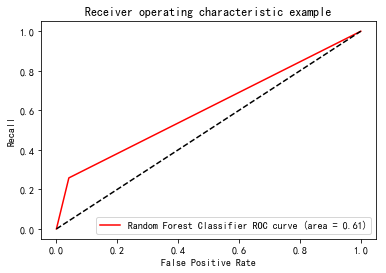

模型名称: Xgboost Classifier
准确率:0.7781,精确率:0.6386,召回率:0.3468,f1-score:0.4495,auc:0.6387


D:\WorkingSoft\Anaconda\install\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


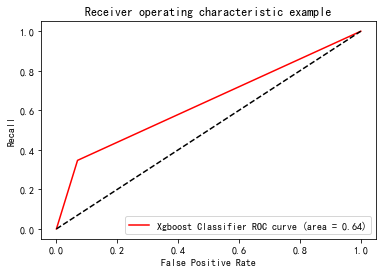

模型名称: LogisticRegression
准确率:0.7619,精确率:0.6364,召回率:0.2070,f1-score:0.3124,auc:0.5826


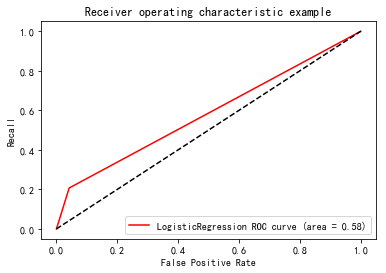

模型名称: Support Vector Machine Classifier
准确率:0.7388,精确率:0.0000,召回率:0.0000,f1-score:0.0000,auc:0.5000


D:\WorkingSoft\Anaconda\install\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\WorkingSoft\Anaconda\install\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


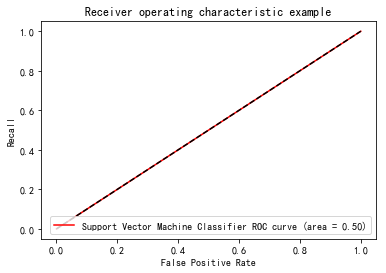

模型名称: Decision Tree Classifier
准确率:0.7079,精确率:0.4371,召回率:0.4113,f1-score:0.4238,auc:0.6120


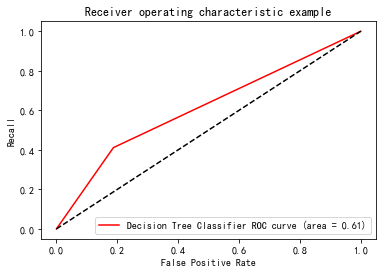

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt

classifiers = {
        'Random Forest Classifier' : clf0,
        'Xgboost Classifier' : clf1,
        'LogisticRegression' : clf2,
        'Support Vector Machine Classifier' : clf3,
        'Decision Tree Classifier' : clf4,
        }

for model_name,model in classifiers.items():
    print('模型名称:',model_name)
    y_test_pred = model.predict(x_test)
    acc = metrics.accuracy_score(y_test,y_test_pred)
    precision = metrics.precision_score(y_test,y_test_pred)
    recall = metrics.recall_score(y_test,y_test_pred)
    f1 = metrics.f1_score(y_test,y_test_pred)
    auc = metrics.roc_auc_score(y_test,y_test_pred)
    print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))
    
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score as AUC

    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.figure()

    #plt.figure()  #只建立一个画布，将所有的ROC曲线在一个画布上画出来
    FPR, recall, thresholds = roc_curve(y_test,y_test_pred, pos_label=1)
    area = AUC(y_test,y_test_pred)
    plt.plot(FPR, recall,color='red',label='{} ROC curve (area = {:.2f})'.format(model_name,area))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()